In [1]:
#import data into d
import pandas as pd
import csv
with open('wine.data') as f:
    reader = csv.reader(f,delimiter=",")
    d = list(reader)
names = ['Class','Alcohol','Malic_Ash','Ash','Alcalinity_of_ash','Magnesium',
        'Total_phenols','Flavanoids','Nonflavanoid_phenols',
        'Proanthocyanins','Color_intensity','Hue',
        'OD280/OD315 of diluted wines','Proline']
for x in range(0,len(d)):
    d[x]=pd.to_numeric(d[x],errors='coerce')
dataFrame=pd.DataFrame(data=d,columns=names)
#print(dataFrame)

In [2]:
classData=dataFrame['Class']
featureData=dataFrame.drop(['Class'],axis=1)
featureNames=['Alcohol','Malic_Ash','Ash','Alcalinity_of_ash','Magnesium',
        'Total_phenols','Flavanoids','Nonflavanoid_phenols',
        'Proanthocyanins','Color_intensity','Hue',
        'OD280/OD315 of diluted wines','Proline']

In [20]:
from sklearn import tree
#limit depth to 3
clf = tree.DecisionTreeClassifier(max_depth=3)

clf = clf.fit(featureData, classData)

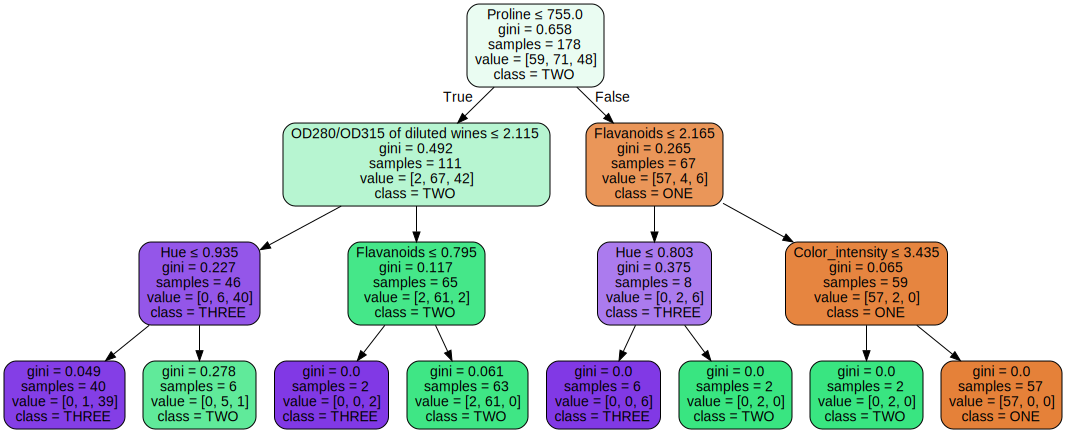

In [21]:
#print tree
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Class") 

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=featureNames,  
                         class_names=['ONE','TWO','THREE'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [70]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

cv_scores=[]
for x in range(10):
    #split data
    X_train,X_test,y_train,y_test=train_test_split(featureData,classData,test_size=0.1,random_state=0)
    #create and fit classifier
    knn= KNeighborsClassifier(n_neighbors=x+1)
    knn.fit(X_train,y_train)
    #do k fold validation with 10 folds
    scores=cross_val_score(knn, featureData,classData,cv=10)
    # average scores
    cv_scores=scores.mean()
    print(x+1,'Nearest Neighbors')
    print(cv_scores)

1 Nearest Neighbors
0.747813467492
2 Nearest Neighbors
0.670803233574
3 Nearest Neighbors
0.721934124527
4 Nearest Neighbors
0.665357327141
5 Nearest Neighbors
0.675773993808
6 Nearest Neighbors
0.670912882697
7 Nearest Neighbors
0.663968438252
8 Nearest Neighbors
0.703259373925
9 Nearest Neighbors
0.698071465428
10 Nearest Neighbors
0.697744668043


The results seem to peak at k=1, 3, and 8, with the highest peak at k=1